# Overall Steps:

The section that this notebook details is in bold.

1. Aquire satellite data (these codes are for GRACE and CHAMP, but modification should be simple)
2. Construct a dataframe that contains all of the satellite epemeris data for the time period as the rows.
    - This is done to make the act of looping (marginally) faster.  Opening and closing files is (sometimes) a slow task.
    - These files are for 2002-2009
3. Use the dataframe constructed in Step 2 to sample the MSISe00 and MSISe2. The data is concatenated as additional columns on the full satellite dataframes.
    - The provided code uses Greg Lucas's pymsis module to sample both MSISe00 and MSISe2.
    - save these sampled dataframes as new pickle files to be accessed.
    - (if you run the data one year at a time, the dataframes will need to be combined)
4. Loop through each day of the period of interest and construct a day-to-night ratio for each day. Save the averged data and day-to-night ratios in a separate dataframe pickle.
    - This is done as a latitudinal average.  The code to do this is provided.
    - Naming conventions can make this process difficult. 
5. **Make plots to showcase your hardwork**





In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rc
from datetime import datetime,timedelta
import os


In [28]:
%reset -f

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rc
from datetime import datetime,timedelta
import os



##############################################################
# Plot INPUT PARAMETERS:
##############################################################
SAT_CHOOSE = 'champ'

full_msis00 = pd.read_pickle('constructed_files/pyMSIS00_'+SAT_CHOOSE)
full_msis2 = pd.read_pickle('constructed_files/pyMSIS2_'+SAT_CHOOSE)

DNR_msis00 = pd.read_pickle('constructed_files/DNR_pymsis00_'+SAT_CHOOSE+'.pkl')
DNR_msis2 = pd.read_pickle('constructed_files/DNR_pymsis2_'+SAT_CHOOSE+'.pkl')

if SAT_CHOOSE == 'champ':
    den_string = 'D400'
elif SAT_CHOOSE == 'grace':
    den_string = 'D500'

##############################################################



/home/zawa8770/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


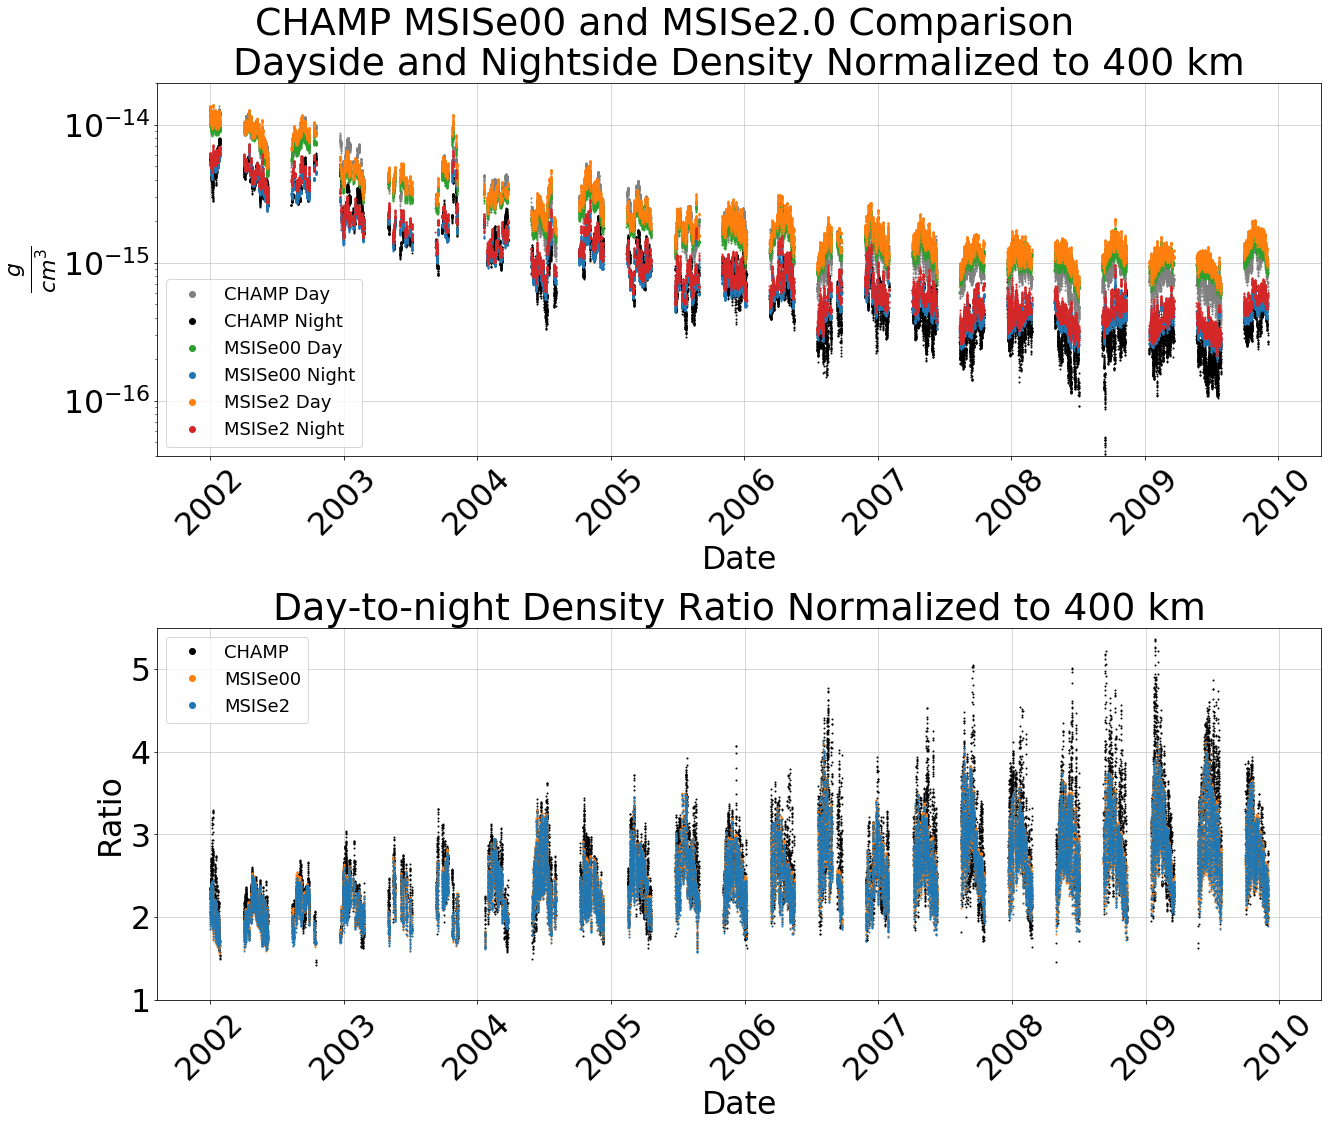

In [48]:

pd.plotting.register_matplotlib_converters()
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl

mpl.rcParams['lines.markersize'] = 2
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 31.5})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'



fig, ( ax2, ax3) = plt.subplots(2,1, figsize=(20,16), sharex=False)


plt.suptitle('CHAMP: MSISe00 and MSISe2.0 Comparison')

ax2.set_title('Dayside and Nightside Density Normalized to 400 km')

ax2.semilogy(pd.to_datetime(DNR_msis00['DateDay'] ), DNR_msis00['Day_'+den_string+'_sat']*1e-3,'.', ms=2, color = 'grey', label = 'CHAMP Day')
ax2.semilogy(pd.to_datetime(DNR_msis00['DateNight'] ), DNR_msis00['Night_'+den_string+'_sat']*1e-3 ,'.', ms=2, color = 'k', label = 'CHAMP Night')

ax2.semilogy(pd.to_datetime(DNR_msis00['DateDay'] ), DNR_msis00['Day_'+den_string+'_msis']*1e-3,'.', ms=2, color = 'tab:green', label = 'MSISe00 Day')
ax2.semilogy(pd.to_datetime(DNR_msis00['DateNight'] ), DNR_msis00['Night_'+den_string+'_msis']*1e-3 ,'.', ms=2, color = 'tab:blue', label = 'MSISe00 Night')
# 
ax2.semilogy(pd.to_datetime(DNR_msis2['DateDay'] ), DNR_msis2['Day_'+den_string+'_msis']*1e-3,'.', ms=2, color = 'tab:orange', label = 'MSISe2 Day')
ax2.semilogy(pd.to_datetime(DNR_msis2['DateNight'] ), DNR_msis2['Night_'+den_string+'_msis']*1e-3 ,'.', ms=2, color = 'tab:red', label = 'MSISe2 Night')


ax2.set(xlabel= 'Date') 
ax2.set(ylabel=   r'$\frac{g}{cm^3}$')  
ax2.legend(markerscale = 6, prop={'size': 18});
ax2.set(ylim =  [4e-17,2e-14 ]) 


ax3.set_title('Day-to-night Density Ratio Normalized to 400 km')
ax3.plot(pd.to_datetime(DNR_msis2['DateDay'] ), DNR_msis2['ratio_'+den_string+'_sat'] ,'.',color = 'black',label = 'CHAMP')

ax3.plot(pd.to_datetime(DNR_msis00['DateDay'] ), DNR_msis00['ratio_'+den_string+'_msis'] ,'.',color = 'tab:orange',label = 'MSISe00')
ax3.plot(pd.to_datetime(DNR_msis2['DateDay'] ), DNR_msis2['ratio_'+den_string+'_msis'] ,'.',color = 'tab:blue',label = 'MSISe2')
ax3.set(xlabel= 'Date') 
ax3.set(ylabel=   r'$\frac{g}{cm^3}$')  
# ax3.legend(['GRACE','MSISe00 '], markerscale = 6, prop={'size': 24})
ax3.set(xlabel= 'Date') 
ax3.set(ylabel=  'Ratio')  
ax3.legend(markerscale = 6, prop={'size': 18});
ax3.set(ylim =  [1,5.5])  


fig.tight_layout( pad=2.0)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)


    


In [37]:

# pd.plotting.register_matplotlib_converters()
# %matplotlib inline
# import matplotlib.pyplot as plt
# from matplotlib import rc
# import matplotlib as mpl

# mpl.rcParams['lines.markersize'] = 2
# plt.rcParams['axes.grid'] = True
# plt.rcParams['grid.alpha'] = 1
# plt.rcParams['grid.color'] = "#cccccc"
# plt.rcParams.update({'font.size': 31.5})
# rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
# plt.rcParams['axes.titlesize']='large' 
# plt.rcParams['axes.titlepad']= 3
# rc('text', usetex=False)
# plt.rcParams["legend.loc"] = 'best'



# fig, ( ax2, ax3) = plt.subplots(2,1, figsize=(20,16), sharex=False)


# plt.suptitle('GRACE Sampled Density Comparisons')

# ax2.set_title('Dayside and Nightside Density Comparison')

# # ax2.semilogy(pd.to_datetime(DNR_df_msis2['DateDay'] ), DNR_df_msis2['Day_'+den_string+'_sat']*1e-3,'.', ms=2, color = 'tab:orange')
# # ax2.semilogy(pd.to_datetime(DNR_df_msis2['DateNight'] ), DNR_df_msis2['Night_'+den_string+'_sat']*1e-3 ,'.', ms=2, color = 'tab:red')
# ax2.semilogy(pd.to_datetime(DNR_df['DateDay'] ), DNR_df['Day_'+den_string+'_sat']*1e-3,'.', ms=2, color = 'tab:green')
# ax2.semilogy(pd.to_datetime(DNR_df['DateNight'] ), DNR_df['Night_'+den_string+'_sat']*1e-3 ,'.', ms=2, color = 'tab:blue')
# # 


# ax2.set(xlabel= 'Date') 
# ax2.set(ylabel=   r'$\frac{g}{cm^3}$')  
# ax2.legend(['MSISe2.0 Dayside', 'MSISe2.0 Nightside','MSISe00 Dayside', 'MSISe00 Nightside' ], markerscale = 6, prop={'size': 18} )


# ax3.set_title('Day-to-night Density Ratio')
# ax3.plot(pd.to_datetime(DNR_df['DateDay'] ), DNR_df['ratio_'+den_string+'_sat'] ,'.',color = 'tab:orange')
# ax3.plot(pd.to_datetime(DNR_df['DateDay'] ), DNR_df['ratio_'+den_string+'_msis'] ,'.',color = 'tab:blue')
# ax3.set(ylim =  [1,10])  

# # ax3.plot(pd.to_datetime(DNR_df_msis2['DateDay'] ), DNR_df_msis2['ratio_'+den_string+'_sat'] ,'.',color = 'tab:red')

# ax3.set(xlabel= 'Date') 
# ax3.set(ylabel=   r'$\frac{g}{cm^3}$')  
# ax3.legend(['GRACE','MSISe00 '], markerscale = 6, prop={'size': 24})
# ax3.set(xlabel= 'Date') 
# ax3.set(ylabel=  'Ratio')  


# fig.tight_layout( pad=2.0)

# for ax in fig.axes:
#     plt.sca(ax)
#     plt.xticks(rotation=45)


    


In [21]:
%reset -f

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rc
from datetime import datetime,timedelta
import os



##############################################################
# Plot INPUT PARAMETERS:
##############################################################
SAT_CHOOSE = 'grace'

full_msis00 = pd.read_pickle('constructed_files/pyMSIS00_'+SAT_CHOOSE)
full_msis2 = pd.read_pickle('constructed_files/pyMSIS2_'+SAT_CHOOSE)

DNR_msis00 = pd.read_pickle('constructed_files/DNR_pymsis00_'+SAT_CHOOSE+'.pkl')
DNR_msis2 = pd.read_pickle('constructed_files/DNR_pymsis2_'+SAT_CHOOSE+'.pkl')

if SAT_CHOOSE == 'champ':
    den_string = 'D400'
elif SAT_CHOOSE == 'grace':
    den_string = 'D500'

##############################################################



/home/zawa8770/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


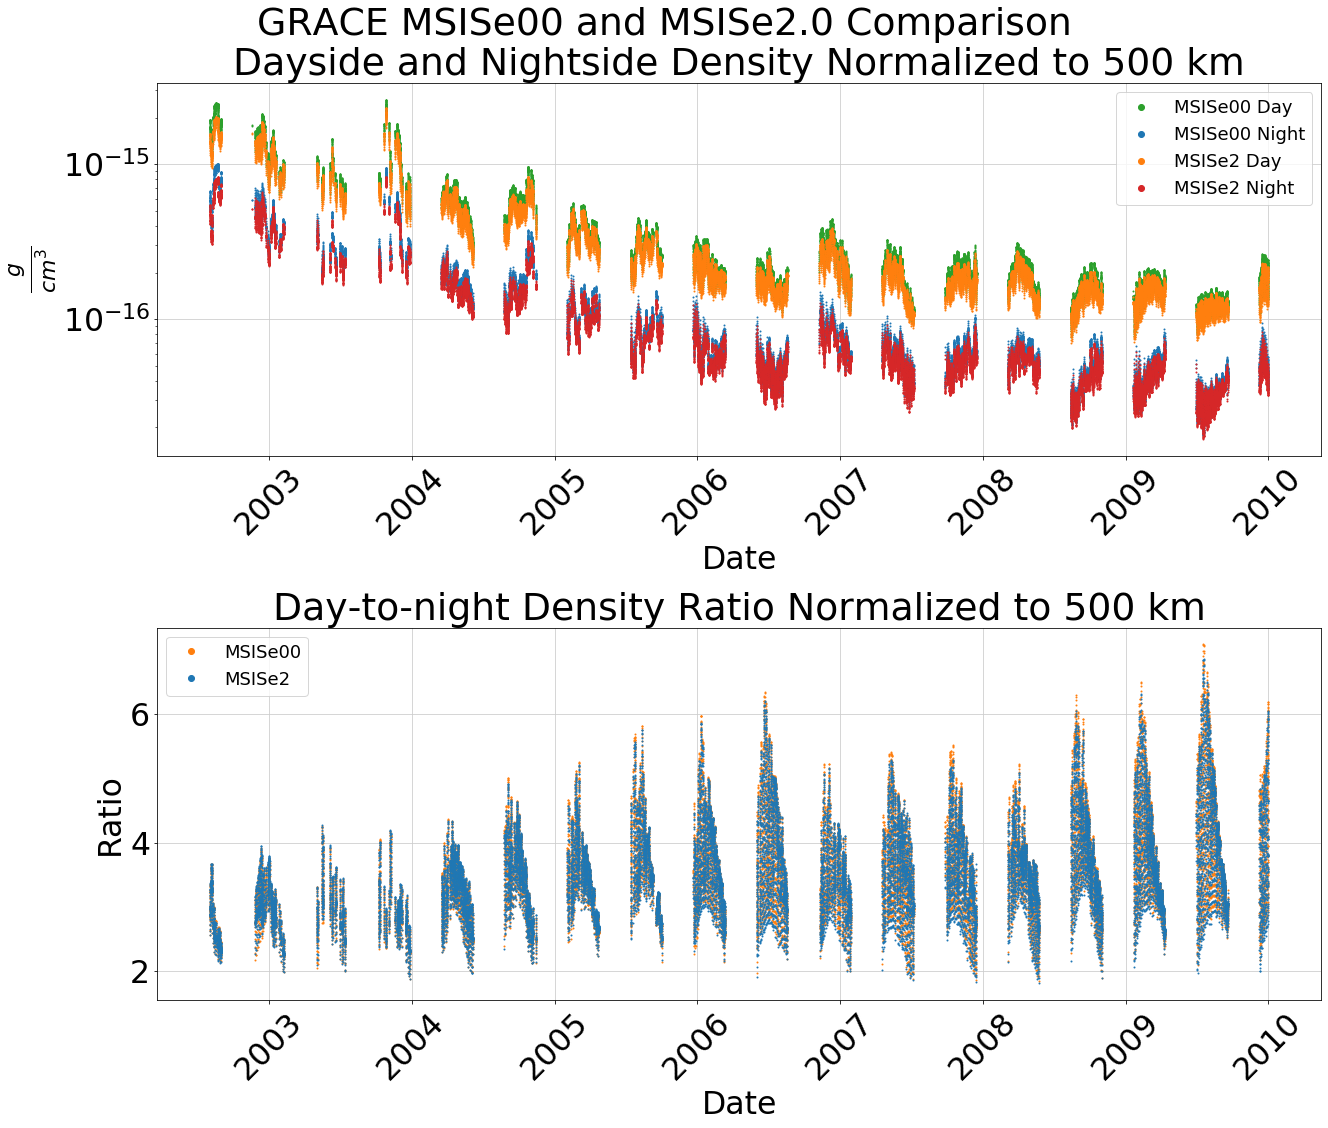

In [23]:

pd.plotting.register_matplotlib_converters()
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl

mpl.rcParams['lines.markersize'] = 2
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 31.5})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'



fig, ( ax2, ax3) = plt.subplots(2,1, figsize=(20,16), sharex=False)


plt.suptitle('GRACE MSISe00 and MSISe2.0 Comparison')

ax2.set_title('Dayside and Nightside Density Normalized to 500 km')

ax2.semilogy(pd.to_datetime(DNR_msis00['DateDay'] ), DNR_msis00['Day_'+den_string+'_msis']*1e-3,'.', ms=2, color = 'tab:green', label = 'MSISe00 Day')
ax2.semilogy(pd.to_datetime(DNR_msis00['DateNight'] ), DNR_msis00['Night_'+den_string+'_msis']*1e-3 ,'.', ms=2, color = 'tab:blue', label = 'MSISe00 Night')
# 
ax2.semilogy(pd.to_datetime(DNR_msis2['DateDay'] ), DNR_msis2['Day_'+den_string+'_msis']*1e-3,'.', ms=2, color = 'tab:orange', label = 'MSISe2 Day')
ax2.semilogy(pd.to_datetime(DNR_msis2['DateNight'] ), DNR_msis2['Night_'+den_string+'_msis']*1e-3 ,'.', ms=2, color = 'tab:red', label = 'MSISe2 Night')


ax2.set(xlabel= 'Date') 
ax2.set(ylabel=   r'$\frac{g}{cm^3}$')  
ax2.legend(markerscale = 6, prop={'size': 18});


ax3.set_title('Day-to-night Density Ratio Normalized to 500 km')
ax3.plot(pd.to_datetime(DNR_msis00['DateDay'] ), DNR_msis00['ratio_'+den_string+'_msis'] ,'.',color = 'tab:orange',label = 'MSISe00')
ax3.plot(pd.to_datetime(DNR_msis2['DateDay'] ), DNR_msis2['ratio_'+den_string+'_msis'] ,'.',color = 'tab:blue',label = 'MSISe2')
ax3.set(xlabel= 'Date') 
ax3.set(ylabel=   r'$\frac{g}{cm^3}$')  
# ax3.legend(['GRACE','MSISe00 '], markerscale = 6, prop={'size': 24})
ax3.set(xlabel= 'Date') 
ax3.set(ylabel=  'Ratio')  
ax3.legend(markerscale = 6, prop={'size': 18});


fig.tight_layout( pad=2.0)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)


    


/home/zawa8770/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


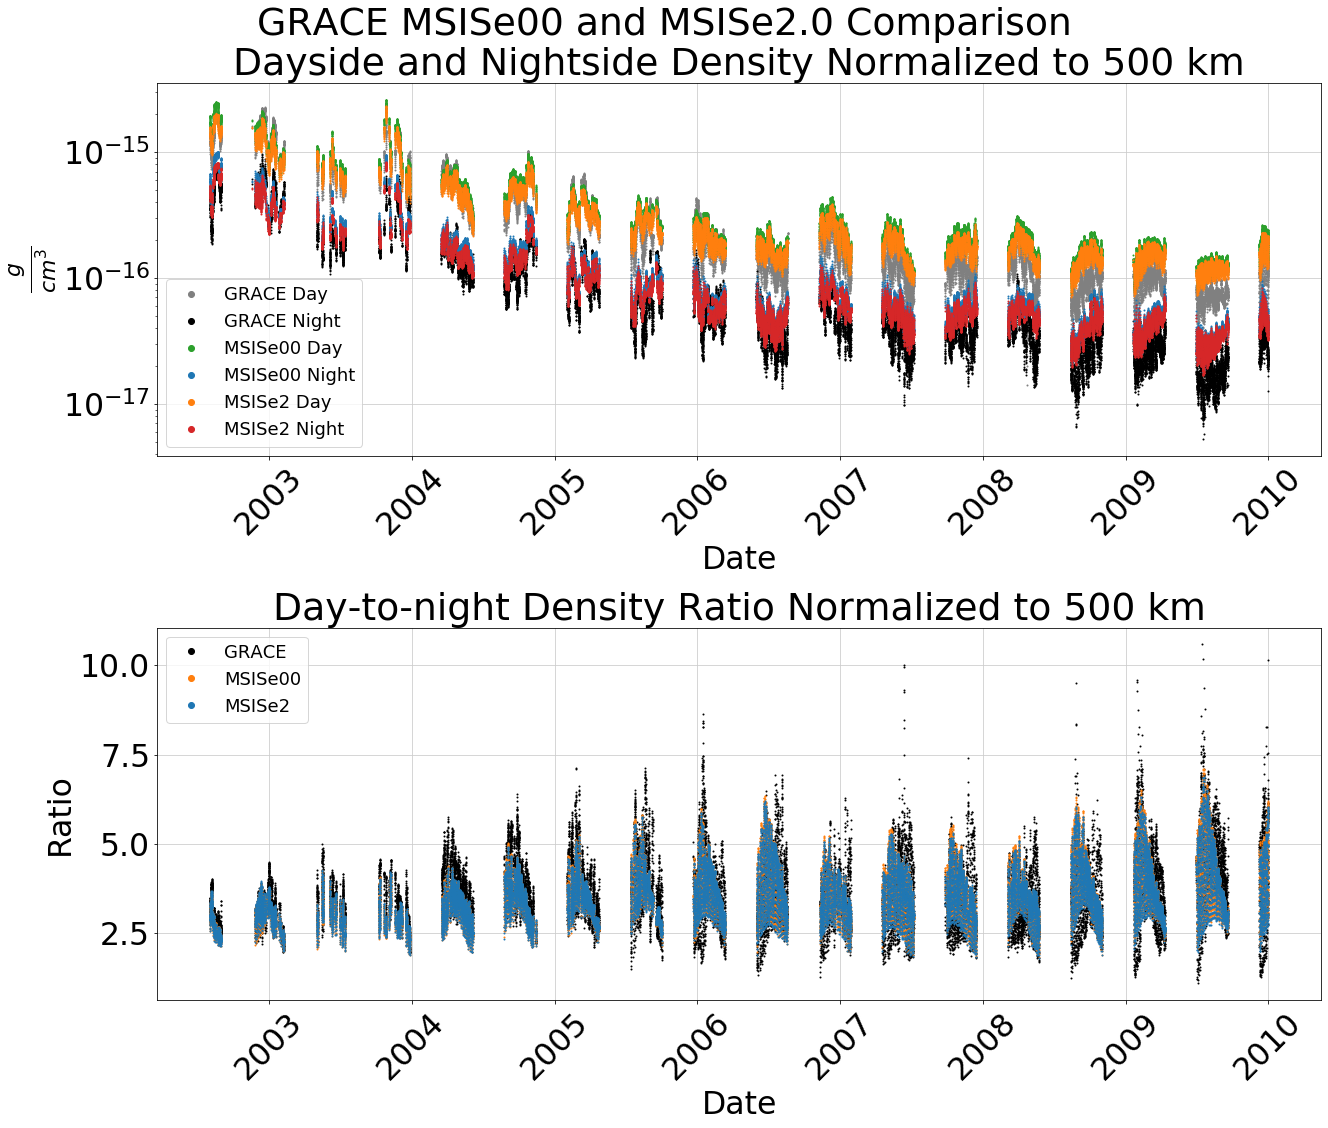

In [26]:

pd.plotting.register_matplotlib_converters()
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl

mpl.rcParams['lines.markersize'] = 2
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 31.5})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'



fig, ( ax2, ax3) = plt.subplots(2,1, figsize=(20,16), sharex=False)


plt.suptitle('GRACE MSISe00 and MSISe2.0 Comparison')

ax2.set_title('Dayside and Nightside Density Normalized to 500 km')

ax2.semilogy(pd.to_datetime(DNR_msis00['DateDay'] ), DNR_msis00['Day_'+den_string+'_sat']*1e-3,'.', ms=2, color = 'grey', label = 'GRACE Day')
ax2.semilogy(pd.to_datetime(DNR_msis00['DateNight'] ), DNR_msis00['Night_'+den_string+'_sat']*1e-3 ,'.', ms=2, color = 'k', label = 'GRACE Night')

ax2.semilogy(pd.to_datetime(DNR_msis00['DateDay'] ), DNR_msis00['Day_'+den_string+'_msis']*1e-3,'.', ms=2, color = 'tab:green', label = 'MSISe00 Day')
ax2.semilogy(pd.to_datetime(DNR_msis00['DateNight'] ), DNR_msis00['Night_'+den_string+'_msis']*1e-3 ,'.', ms=2, color = 'tab:blue', label = 'MSISe00 Night')
# 
ax2.semilogy(pd.to_datetime(DNR_msis2['DateDay'] ), DNR_msis2['Day_'+den_string+'_msis']*1e-3,'.', ms=2, color = 'tab:orange', label = 'MSISe2 Day')
ax2.semilogy(pd.to_datetime(DNR_msis2['DateNight'] ), DNR_msis2['Night_'+den_string+'_msis']*1e-3 ,'.', ms=2, color = 'tab:red', label = 'MSISe2 Night')


ax2.set(xlabel= 'Date') 
ax2.set(ylabel=   r'$\frac{g}{cm^3}$')  
ax2.legend(markerscale = 6, prop={'size': 18});


ax3.set_title('Day-to-night Density Ratio Normalized to 500 km')
ax3.plot(pd.to_datetime(DNR_msis2['DateDay'] ), DNR_msis2['ratio_'+den_string+'_sat'] ,'.',color = 'black',label = 'GRACE')

ax3.plot(pd.to_datetime(DNR_msis00['DateDay'] ), DNR_msis00['ratio_'+den_string+'_msis'] ,'.',color = 'tab:orange',label = 'MSISe00')
ax3.plot(pd.to_datetime(DNR_msis2['DateDay'] ), DNR_msis2['ratio_'+den_string+'_msis'] ,'.',color = 'tab:blue',label = 'MSISe2')
ax3.set(xlabel= 'Date') 
ax3.set(ylabel=   r'$\frac{g}{cm^3}$')  
# ax3.legend(['GRACE','MSISe00 '], markerscale = 6, prop={'size': 24})
ax3.set(xlabel= 'Date') 
ax3.set(ylabel=  'Ratio')  
ax3.legend(markerscale = 6, prop={'size': 18});


fig.tight_layout( pad=2.0)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)


    
